In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

constituency_pd = pd.read_csv("constuency_position.csv")[["จังหวัด", "จำนวนเขต"]]
constituency_pd

c:\Users\kittapat.ra\AppData\Local\Programs\Python\Python39\lib\site-packages\geopandas\_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.4-CAPI-1.16.2). Conversions between both will be slow.
  warnings.warn(
C:\Users\kittapat.ra\AppData\Local\Temp\ipykernel_11124\564019495.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely

,จังหวัด,จำนวนเขต
0,กรุงเทพมหานคร,33
1,กระบี่,3
2,กาญจนบุรี,5
3,กาฬสินธุ์,6
4,กำแพงเพชร,4
...,...,...
72,อำนาจเจริญ,2
73,อุดรธานี,10
74,อุตรดิตถ์,3
75,อุทัยธานี,2


,P_name,CONS_no,geometry
0,กรุงเทพมหานคร,29,"POLYGON ((100.33093 13.70413, 100.33179 13.704..."
1,ลพบุรี,3,"POLYGON ((100.50808 14.67311, 100.50791 14.673..."
2,สกลนคร,6,"POLYGON ((103.70969 17.34360, 103.70537 17.346..."
3,กรุงเทพมหานคร,28,"POLYGON ((100.40481 13.66259, 100.40481 13.662..."
4,ลพบุรี,4,"POLYGON ((100.82419 14.97648, 100.82477 14.976..."
...,...,...,...
395,สกลนคร,4,"POLYGON ((103.64373 17.11436, 103.64330 17.114..."
396,เชียงราย,2,"POLYGON ((99.93772 19.82575, 99.93745 19.82568..."
397,กรุงเทพมหานคร,26,"POLYGON ((100.47040 13.65858, 100.47045 13.658..."
398,เชียงราย,3,"POLYGON ((99.53720 19.16286, 99.53762 19.16255..."


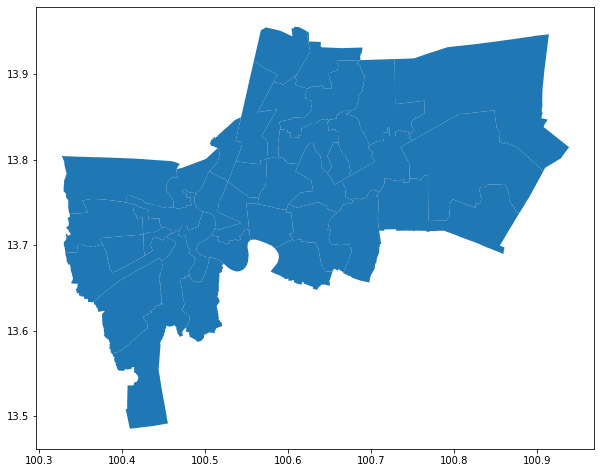

In [4]:
changwat_gpd[changwat_gpd["P_name"] == "กรุงเทพมหานคร"].plot(figsize = (10,20))
plt.show()

In [62]:
th_const_gpd = changwat_gpd.copy()
th_const_gpd["CONS_sum"] = 1
th_const_gpd

,P_name,CONS_no,geometry,CONS_sum
0,กรุงเทพมหานคร,29,"POLYGON ((100.33093 13.70413, 100.33179 13.704...",1
1,ลพบุรี,3,"POLYGON ((100.50808 14.67311, 100.50791 14.673...",1
2,สกลนคร,6,"POLYGON ((103.70969 17.34360, 103.70537 17.346...",1
3,กรุงเทพมหานคร,28,"POLYGON ((100.40481 13.66259, 100.40481 13.662...",1
4,ลพบุรี,4,"POLYGON ((100.82419 14.97648, 100.82477 14.976...",1
...,...,...,...,...
395,สกลนคร,4,"POLYGON ((103.64373 17.11436, 103.64330 17.114...",1
396,เชียงราย,2,"POLYGON ((99.93772 19.82575, 99.93745 19.82568...",1
397,กรุงเทพมหานคร,26,"POLYGON ((100.47040 13.65858, 100.47045 13.658...",1
398,เชียงราย,3,"POLYGON ((99.53720 19.16286, 99.53762 19.16255...",1


In [66]:
from shapely.geometry import MultiPolygon
import shapely

th_const_gpd["geometry"] = th_const_gpd.geometry.apply(lambda x: x if x.geom_type == "Polygon" else shapely.unary_union(x.geoms))
th_const_gpd["geometry"] = th_const_gpd.geometry.apply(lambda x: x if x.geom_type == "Polygon" else max(list(x.geoms), key=lambda a: a.area))

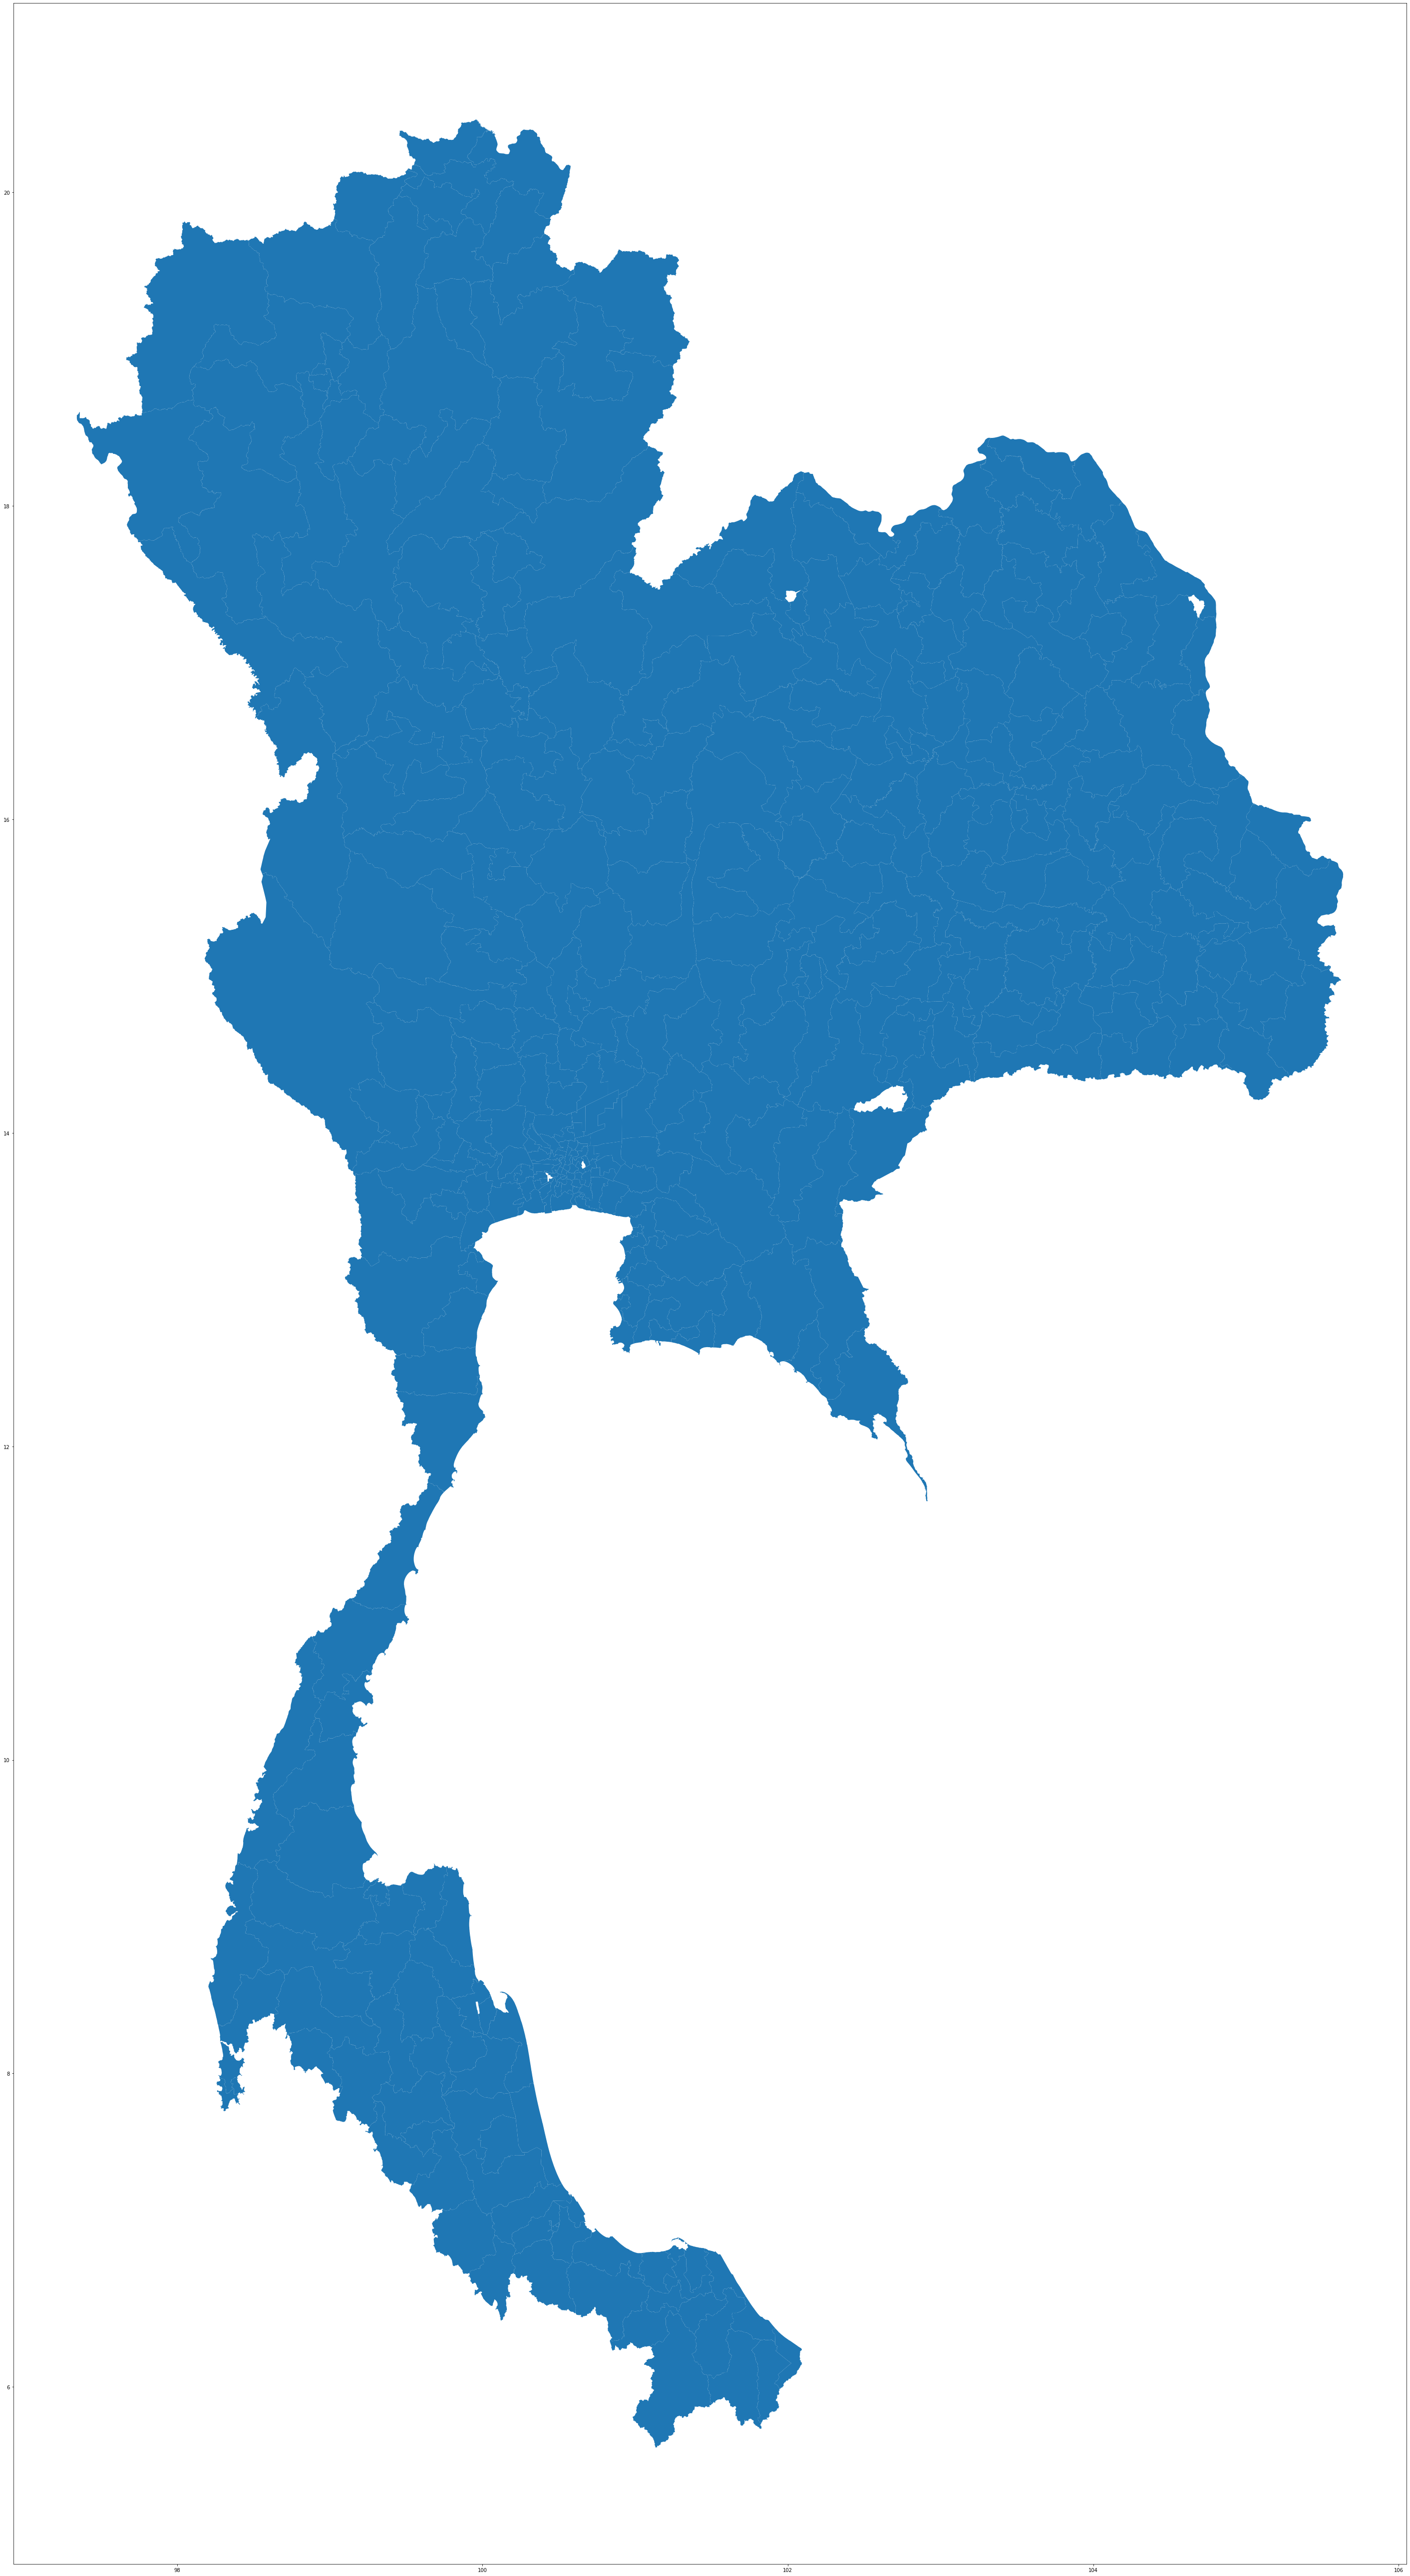

In [67]:
th_const_gpd.plot(figsize = (50, 100))
plt.show()

In [68]:
non_bkk_gpd = th_const_gpd[th_const_gpd["P_name"] != "กรุงเทพมหานคร"].reset_index().to_file("non_bkk.geojson")
bkk_gpd = th_const_gpd[th_const_gpd["P_name"] == "กรุงเทพมหานคร"].reset_index().to_file("bkk.geojson")

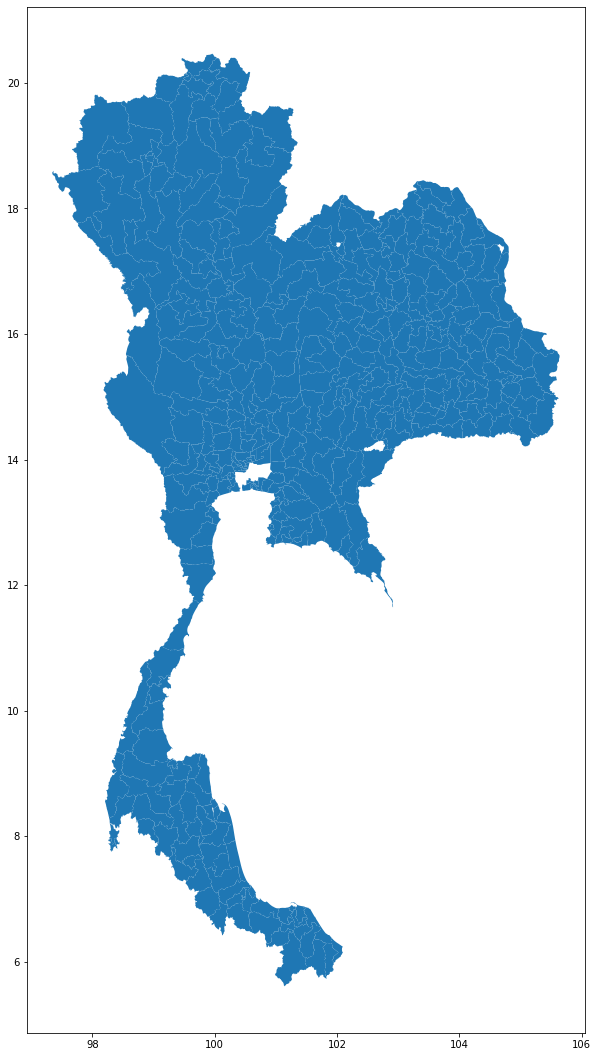

In [56]:
non_bkk_gpd.plot(figsize = (10,20))
plt.show()

In [ ]:
import numpy as np

hex_area = transformed_geodf.area.sum() / (400 - 33)
unit = (1/3 * hex_area / np.sin(np.pi / 3)) ** 0.5

from shapely.geometry import Polygon

xmin, ymin, xmax, ymax = transformed_geodf.total_bounds
a = np.sin(np.pi / 3)
cols = np.arange(np.floor(xmin), np.ceil(xmax), 3 * unit)
rows = np.arange(np.floor(ymin) / a, np.ceil(ymax) / a, unit)

hexagons = []
for x in cols:
  for i, y in enumerate(rows):
    if (i % 2 == 0):
      x0 = x
    else:
      x0 = x + 1.5 * unit

    hexagons.append(Polygon([
      (x0, y * a),
      (x0 + unit, y * a),
      (x0 + (1.5 * unit), (y + unit) * a),
      (x0 + unit, (y + (2 * unit)) * a),
      (x0, (y + (2 * unit)) * a),
      (x0 - (0.5 * unit), (y + unit) * a),
    ]))

grid = gpd.GeoDataFrame({'geometry': hexagons})
grid["grid_area"] = grid.area
grid = grid.reset_index().rename(columns={"index": "grid_id"})

C:\Users\kittapat.ra\AppData\Local\Temp\ipykernel_18572\3638553579.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  hex_area = transformed_geodf.area.sum() / (400 - 33)


In [ ]:
transformed_geodf["color"] = [("#"+''.join([np.random.choice(list('0123456789ABCDEF')) for _ in range(6)])) for _ in range(76)]
transformed_geodf

,province_th,geometry,จังหวัด,จำนวนเขต,prop,color
0,นครราชสีมา,"MULTIPOLYGON (((102.08479 14.29543, 102.08477 ...",นครราชสีมา,16,16.155280,#91DDBD
1,อุบลราชธานี,"MULTIPOLYGON (((104.91257 14.47104, 104.91248 ...",อุบลราชธานี,11,11.757711,#8EA591
2,ขอนแก่น,"POLYGON ((101.83450 16.11376, 101.83420 16.113...",ขอนแก่น,11,10.279621,#13A8C4
3,บุรีรัมย์,"MULTIPOLYGON (((102.32998 14.18757, 102.32978 ...",บุรีรัมย์,10,10.954709,#090B36
4,นครศรีธรรมราช,"MULTIPOLYGON (((99.32812 8.08173, 99.32839 8.0...",นครศรีธรรมราช,10,10.680861,#D94B7F
...,...,...,...,...,...,...
71,อำนาจเจริญ,"POLYGON ((104.88955 15.84984, 104.88959 15.849...",อำนาจเจริญ,2,2.153068,#6D6094
72,สมุทรสงคราม,"POLYGON ((99.37651 13.26578, 99.37635 13.26582...",สมุทรสงคราม,1,0.602317,#8947BD
73,สิงห์บุรี,"POLYGON ((99.83788 15.67685, 99.83765 15.67671...",สิงห์บุรี,1,0.631475,#C1B98D
74,ระนอง,"POLYGON ((98.49554 9.52707, 98.49452 9.52658, ...",ระนอง,1,1.469370,#859424


In [ ]:
intersected = gpd.overlay(transformed_geodf, grid, how = 'intersection')
intersected["area_"] = intersected.area
max_intersection = intersected.loc[intersected.index.isin(intersected.groupby(["grid_id"]).area_.idxmax())]
tagged_grid = grid.merge(max_intersection[["grid_id", "province_th", "color"]], how = "left", on = "grid_id")
tagged_grid = tagged_grid.fillna("")
tagged_grid.to_file("grid.geojson", driver = "GeoJSON")

C:\Users\kittapat.ra\AppData\Local\Temp\ipykernel_18572\2836912145.py:1: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: EPSG:4326
Right CRS: None

  intersected = gpd.overlay(transformed_geodf, grid, how = 'intersection')
C:\Users\kittapat.ra\AppData\Local\Temp\ipykernel_18572\2836912145.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  intersected["area_"] = intersected.area


In [ ]:
transformed_geodf[["จังหวัด", "จำนวนเขต"]]

,จังหวัด,จำนวนเขต
0,นครราชสีมา,16
1,อุบลราชธานี,11
2,ขอนแก่น,11
3,บุรีรัมย์,10
4,นครศรีธรรมราช,10
...,...,...
71,อำนาจเจริญ,2
72,สมุทรสงคราม,1
73,สิงห์บุรี,1
74,ระนอง,1


In [ ]:
hexmap.groupby("province_th").count()[["color"]].reset_index().sort_values("color")

,province_th,color
66,อ่างทอง,1
46,ลำพูน,1
8,ชัยนาท,1
55,สุพรรณบุรี,2
60,หนองบัวลำภู,2
...,...,...
62,อุดรธานี,12
49,สงขลา,14
18,นครศรีธรรมราช,14
17,นครราชสีมา,17


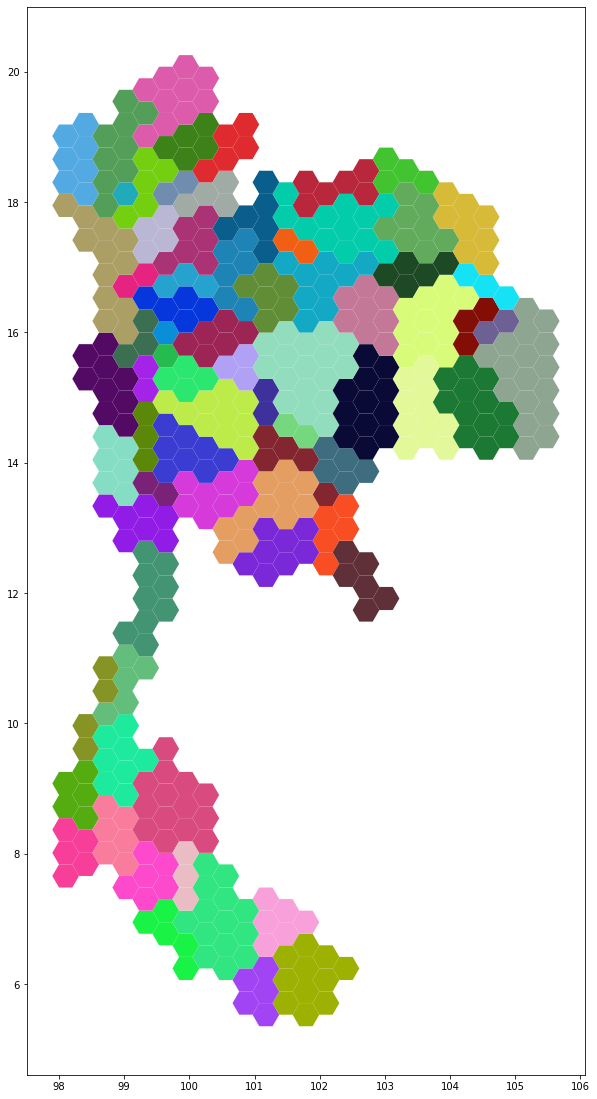

In [ ]:
hexmap = tagged_grid[~tagged_grid.grid_id.isin(tagged_grid[tagged_grid.province_th == ""].grid_id)]
hexmap.plot(figsize = (10,20), color = hexmap["color"])
plt.show()